#### THIS WORKBOOK DEMONSTRATES HOW CATEGORICAL DATA IS TRANSFORMED TO FEATURES SUITABLE TO BE FED INTO A MACHINE LEARNING MODEL

SCENARIO

You are a data scientist at a clothing company and are working with a data set of customer reviews.
You are tasked with transforming some of these features to make the data more useful for analysis.

In [125]:
import numpy as np
import pandas as pd
import os
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [77]:
os.listdir()

['customer_reviews.csv', 'Data_to_feature.ipynb', '.ipynb_checkpoints']

We explore the first few lines of our data post import

In [110]:
reviews=pd.read_csv('customer_reviews.csv')
reviews.head()

,clothing_id,age,review_title,review_text,recommended,division_name,department_name,review_date,rating
0,1095,39,"Cute,looks like a dress on",If you are afraid of the jumpsuit trend but li...,True,General,Dresses,2019-07-08,Liked it
1,1095,28,"So cute, great print!",I love fitted top dresses like this but i find...,True,General,Dresses,2019-05-17,Loved it
2,699,37,So flattering!,"I love these cozy, fashionable leggings. they ...",True,Initmates,Intimate,2019-06-24,Loved it
3,1072,36,Effortless,"Another reviewer said it best, ""i love the way...",True,General Petite,Dresses,2019-12-06,Loved it
4,1094,32,You need this!,Rompers are my fav so i'm biased writing this ...,True,General,Dresses,2019-10-04,Loved it


Display the column names of the dataset only along with feature data types.

In [111]:
reviews.columns
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clothing_id      5000 non-null   int64 
 1   age              5000 non-null   int64 
 2   review_title     4174 non-null   object
 3   review_text      4804 non-null   object
 4   recommended      5000 non-null   bool  
 5   division_name    4996 non-null   object
 6   department_name  4996 non-null   object
 7   review_date      5000 non-null   object
 8   rating           5000 non-null   object
dtypes: bool(1), int64(2), object(6)
memory usage: 317.5+ KB
None


Display the number of recommendations of each type.

In [112]:
reviews.recommended.value_counts()

True     4166
False     834
Name: recommended, dtype: int64

In [113]:
reviews.recommended.dtype

dtype('bool')

Suppose we want to transform these values to either 1(True) or 0(False).
we do the following.

In [114]:
binary_dict={True:1,False:0}
reviews.recommended=reviews.recommended.map(binary_dict)
reviews.head()
print(reviews['recommended'].value_counts())

1    4166
0     834
Name: recommended, dtype: int64


Display "rating" of each types

In [115]:
reviews.rating.value_counts()

Loved it     2798
Liked it     1141
Was okay      564
Not great     304
Hated it      193
Name: rating, dtype: int64

In [116]:
rating_dict={'Loved it':5,'Liked it':4,'Was okay':3,'Not great':2,'Hated it':1}
reviews.rating=reviews.rating.map(rating_dict)
print(reviews.rating.value_counts())

5    2798
4    1141
3     564
2     304
1     193
Name: rating, dtype: int64


Now we transform the ddepartment feature which is nominal variable.

In [117]:
print(reviews.department_name.value_counts())
ohe=pd.get_dummies(reviews.department_name)
reviews=reviews.join(ohe)
reviews.head()

Tops        2196
Dresses     1322
Bottoms      848
Intimate     378
Jackets      224
Trend         28
Name: department_name, dtype: int64


,clothing_id,age,review_title,review_text,recommended,division_name,department_name,review_date,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
0,1095,39,"Cute,looks like a dress on",If you are afraid of the jumpsuit trend but li...,1,General,Dresses,2019-07-08,4,0,1,0,0,0,0
1,1095,28,"So cute, great print!",I love fitted top dresses like this but i find...,1,General,Dresses,2019-05-17,5,0,1,0,0,0,0
2,699,37,So flattering!,"I love these cozy, fashionable leggings. they ...",1,Initmates,Intimate,2019-06-24,5,0,0,1,0,0,0
3,1072,36,Effortless,"Another reviewer said it best, ""i love the way...",1,General Petite,Dresses,2019-12-06,5,0,1,0,0,0,0
4,1094,32,You need this!,Rompers are my fav so i'm biased writing this ...,1,General,Dresses,2019-10-04,5,0,1,0,0,0,0


We now transform the "review-date" feature in date-time format.

In [118]:
reviews.review_date=pd.to_datetime(reviews.review_date)
print(reviews.review_date.dtype)

datetime64[ns]


In [119]:
reviews.columns

Index(['clothing_id', 'age', 'review_title', 'review_text', 'recommended',
       'division_name', 'department_name', 'review_date', 'rating', 'Bottoms',
       'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend'],
      dtype='object')

Let's now make our dataframe have only the numerical features.

In [120]:
reviews=reviews[['clothing_id','age','recommended','review_date','rating','Bottoms','Dresses','Intimate','Jackets','Tops','Trend']]

In [121]:
reviews.head()

,clothing_id,age,recommended,review_date,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
0,1095,39,1,2019-07-08,4,0,1,0,0,0,0
1,1095,28,1,2019-05-17,5,0,1,0,0,0,0
2,699,37,1,2019-06-24,5,0,0,1,0,0,0
3,1072,36,1,2019-12-06,5,0,1,0,0,0,0
4,1094,32,1,2019-10-04,5,0,1,0,0,0,0


In [122]:
reviews=reviews.set_index('clothing_id')
reviews.head()

,age,recommended,review_date,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
clothing_id,,,,,,,,,,
1095,39,1,2019-07-08,4,0,1,0,0,0,0
1095,28,1,2019-05-17,5,0,1,0,0,0,0
699,37,1,2019-06-24,5,0,0,1,0,0,0
1072,36,1,2019-12-06,5,0,1,0,0,0,0
1094,32,1,2019-10-04,5,0,1,0,0,0,0


Now we scale the data using a standard scaler.

In [123]:
scaler=StandardScaler()
ages_reshaped=np.array(reviews.age).reshape(-1,1)
reviews.age=scaler.fit_transform(ages_reshaped)

#recommended_reshaped=np.array(reviews.recommended).reshape(-1,1)
#reviews.recommended=scaler.fit_transform(recommended_reshaped)

date_reshaped=np.array(reviews.review_date).reshape(-1,1)
reviews.review_date=scaler.fit_transform(date_reshaped)

reviews.head()

,age,recommended,review_date,rating,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
clothing_id,,,,,,,,,,
1095,-0.348145,1,0.061044,4,0,1,0,0,0,0
1095,-1.244752,1,-0.436508,5,0,1,0,0,0,0
699,-0.511164,1,-0.072912,5,0,0,1,0,0,0
1072,-0.592674,1,1.505859,5,0,1,0,0,0,0
1094,-0.918713,1,0.903056,5,0,1,0,0,0,0


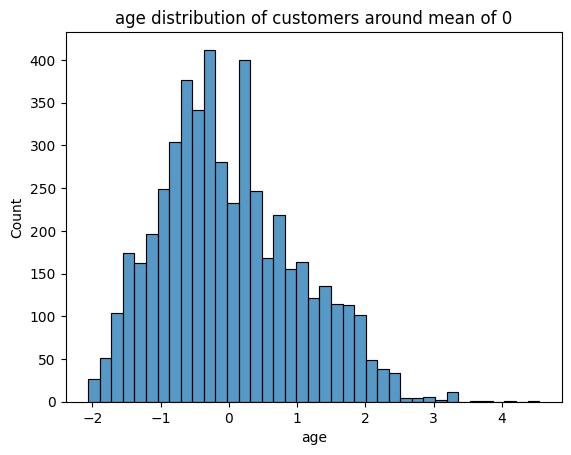

In [128]:
sns.histplot(reviews,x=reviews.age)
plt.title(f"age distribution of customers around mean of 0")
plt.show()
plt.close()